In [7]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import numpy as np

![Alt text](image.png)

In [16]:
x = np.array([[1,23,4,5,6],[1,23,4,5,6],[1,23,4,5,6],[1,23,4,5,6],[1,23,4,5,6],[1,23,4,5,6]])
# y = np.array([[1,23,4],[1,23,4],[1,23,4],[1,23,4],[1,23,4],[1,23,4]])
y = np.array([[1,0,1],[1,0,1],[1,0,1],[1,0,1],[1,0,1],[1,0,1]])

In [17]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, n_input, n_output) -> None:
        super(LogisticRegression,self).__init__()
        self.linear = torch.nn.Linear(n_input,n_output)
    
    def forward(self,x):
        out = self.linear(x)
        out = torch.sigmoid(out)
        return out

In [18]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
x_ = torch.tensor(x,dtype=torch.float32)
y_ = torch.tensor(y,dtype=torch.float32)
dataset = TensorDataset(x_, y_)
n_samples, n_features = x_.shape
batch_size = 2
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [28]:
for i in train_loader:
    print(i)
    print('---')

[tensor([[ 1., 23.,  4.,  5.,  6.],
        [ 1., 23.,  4.,  5.,  6.]]), tensor([[1., 0., 1.],
        [1., 0., 1.]])]
---
[tensor([[ 1., 23.,  4.,  5.,  6.],
        [ 1., 23.,  4.,  5.,  6.]]), tensor([[1., 0., 1.],
        [1., 0., 1.]])]
---
[tensor([[ 1., 23.,  4.,  5.,  6.],
        [ 1., 23.,  4.,  5.,  6.]]), tensor([[1., 0., 1.],
        [1., 0., 1.]])]
---


In [36]:
n_input, n_output = 5,3
model = LogisticRegression(n_input, n_output)

In [43]:
epochs = 10
lr = 1e-3
optimiser = torch.optim.SGD(model.parameters(), lr = lr)
criterion = torch.nn.CrossEntropyLoss()

In [44]:
for epoch in range(epochs):
    for x,y in train_loader:
        optimiser.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimiser.step()
        print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 2.186084270477295
epoch 0, loss 2.163557291030884
epoch 0, loss 2.1420133113861084
epoch 1, loss 2.121527671813965
epoch 1, loss 2.102142810821533
epoch 1, loss 2.083871364593506
epoch 2, loss 2.0667028427124023
epoch 2, loss 2.0506081581115723
epoch 2, loss 2.0355453491210938
epoch 3, loss 2.0214648246765137
epoch 3, loss 2.0083110332489014
epoch 3, loss 1.9960262775421143
epoch 4, loss 1.984553575515747
epoch 4, loss 1.9738357067108154
epoch 4, loss 1.963819146156311
epoch 5, loss 1.9544520378112793
epoch 5, loss 1.945685863494873
epoch 5, loss 1.9374749660491943
epoch 6, loss 1.9297776222229004
epoch 6, loss 1.9225542545318604
epoch 6, loss 1.915769100189209
epoch 7, loss 1.9093883037567139
epoch 7, loss 1.9033820629119873
epoch 7, loss 1.8977214097976685
epoch 8, loss 1.892381191253662
epoch 8, loss 1.8873369693756104
epoch 8, loss 1.8825676441192627
epoch 9, loss 1.8780529499053955
epoch 9, loss 1.8737750053405762
epoch 9, loss 1.8697165250778198


In [45]:
model(x_)

tensor([[0.7065, 0.1416, 0.8121],
        [0.7065, 0.1416, 0.8121],
        [0.7065, 0.1416, 0.8121],
        [0.7065, 0.1416, 0.8121],
        [0.7065, 0.1416, 0.8121],
        [0.7065, 0.1416, 0.8121]], grad_fn=<SigmoidBackward0>)

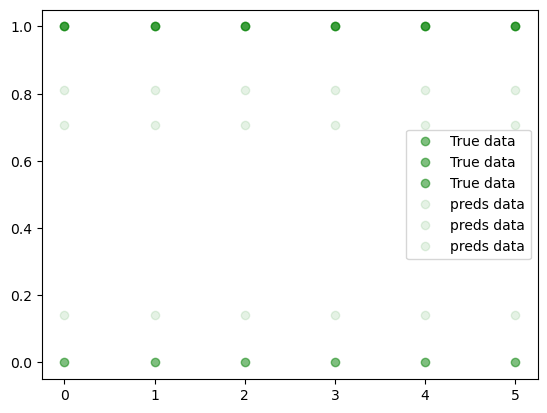

In [47]:
with torch.no_grad():
    preds  = model(x_)

plt.clf()
plt.plot(y_,'go',label='True data', alpha=0.5)
plt.plot(preds.to('cpu'),'go',label='preds data', alpha=0.1)
plt.legend(loc='best')
plt.show()

for epo